# Data visualization with matplotlib

# What are we going to learn today?
***

- Python Data Visualization Libraries
    - Matplotlib
        - Matplotlib basics
   
        - Histograms
        - Box Plots
        - Scatter Plots
<br/><br/>

- Plot Types 
<br/><br/>

- Plot Customization

<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Technical Details
***

In [1]:
# Import the required Libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
# Set it up to work with Jupyter Notebook
# (this is a Jupyter command, not Python code)
%matplotlib inline

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***
### Instructions
* Create a graph for `y = cos(x)`. X values should be from 0 to 10, incrementing in steps of 0.1


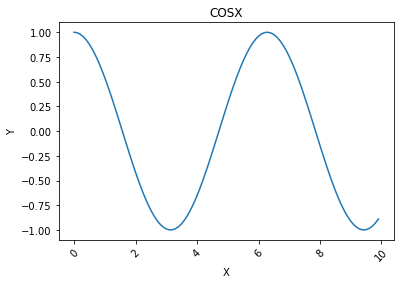

In [2]:
x = np.arange(0,10,0.1)
y = np.cos(x)
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('COSX')
plt.xticks(rotation = 45)
plt.show()

# Let's do this with the Weather data!
***

Quick Refresher:

The Weather Dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records Temperature, Dew Point Temperature, Relative Humidity, Wind Speed, Visibility, Pressure, and Conditions.


### Read the data set

In [3]:
# Data Introduction
import pandas as pd
weather_df = pd.read_csv('../data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_df.head(5)

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## How did the temperature vary amongst the months of the year?
***

Since we want to compare amongst months, we need one value for each month. Let's pick the mean for doing this.

Generate a line chart that visualizes the temperature readings in the month of January:
* x-values should be the values should be the months.
* y-values should be the mean values in the Temp (C) column per month.

Display the plot.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
### Instructions
* The variable `calender_months` is already defined for you. Assign that variable to the variable `x`
* Generate the same plot as above,but this time the values of the "Month" should be January, February etc instead of 1,2,3,etc.

### Plotting: Step 3

Almost done, but not quite. We need the X-axis labels to be a bit more legible. Let's rotate them a bit.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
### Instructions
* Generate the same graph as above, but with the X-axis labels rotated, so that they are legible.

In [4]:
monthly_data = weather_df.groupby(weather_df.index.month).mean()
monthly_data.head(3)

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Date/Time,,,,,,
1,-7.371505,-12.294758,68.383065,18.108871,22.100269,101.005349
2,-4.225000,-9.221695,68.956897,14.837644,25.182184,101.142414
3,3.121237,-3.488575,64.862903,14.514785,26.177957,101.335255


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

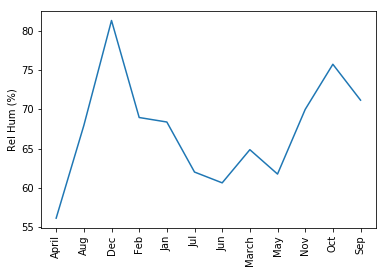

In [5]:
months = ['Jan','Feb','March','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_series = months
y_series = monthly_data['Rel Hum (%)']
sns.lineplot(x = x_series, y = y_series, data = monthly_data)
plt.xticks(rotation = 90)

# Other Plot Types
***

The chart we have so far worked with is called a Line Chart. There are other types of plots. Some important examples are:
- Histograms
- Box Plots
- Scatter Plots

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
### Instructions
* Define the function `hist_plot`
* Find the distribution of values in the Wind Speed column using `plt.hist()`
* Remember to label x axis as `Wind Spd (km/h)` and y label as `Frequency`

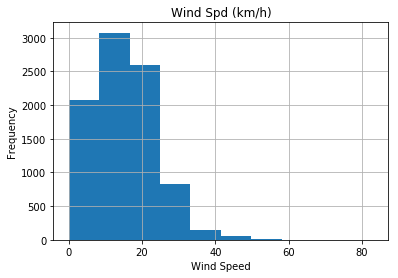

In [6]:
#Matplotlib
weather_df.hist(column = 'Wind Spd (km/h)', bins = 10)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002385A9A4F28>]],
      dtype=object)

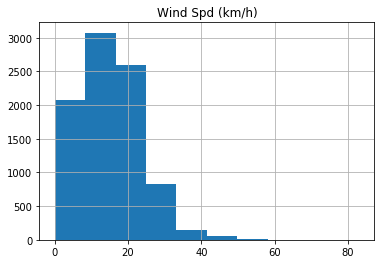

In [7]:
def hist(df,c):
    return df.hist(column = c, bins = 10)
hist(weather_df,'Wind Spd (km/h)')

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***
### Instructions
* Define a function `box_plot`
* Draw a boxplot for wind speed using `plt.boxplot()`

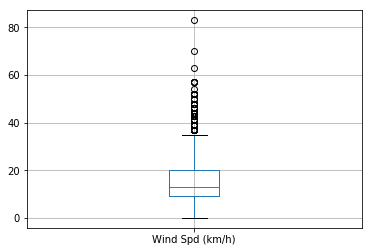

In [8]:
def box_plot(df,c):
    return df.boxplot(column = c)
box_plot(weather_df, 'Wind Spd (km/h)')

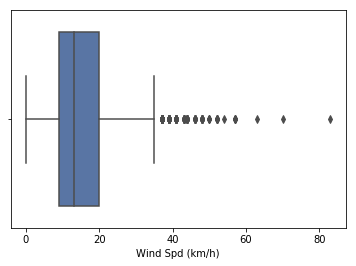

In [9]:
sns.boxplot(x = 'Wind Spd (km/h)', data = weather_df, hue = 'Wind Spd (km/h)', palette='deep')

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 6
***
### Instructions
* Are the temperature and pressure correlated, according to the data in the month of January? Look at it by generating a scatter plot
* The data for the month of january is defined for you in the variable `jan_df`
* Define a function `scatter_plot`
* Plot the graph using `plt.scatter()` by passing parameter `x=jan_df['Temp (C)']`,`y=jan_df['Stn Press (kPa)']`
* Remember to label x axis as `Temp (C)` , y axis as `Pressure` and title as `Corelation between Temperature and Pressure for January`

In [10]:
jan_df = weather_df['2012-01']


Text(0, 0.5, 'Pressure')

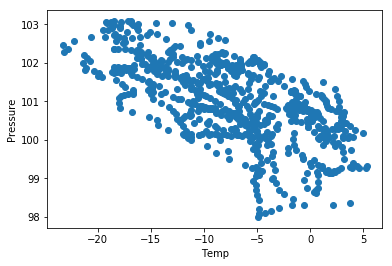

In [11]:
def scatter_plot(a,b,c):
    return plt.scatter(x = a[b], y = a[c])
scatter_plot(jan_df, 'Temp (C)', 'Stn Press (kPa)')
plt.xlabel('Temp')
plt.ylabel('Pressure')

<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

# Plot Customizations
***

Matplotlib being a low level library, provides a lot of ways to customize your plots.

Some examples include:
- Configuring the line (color, width, ticks, etc)
- Configuring the axes (setting limits, layout, etc.)
- Figure and Sub Plots: Multiple plots on one canvas
- Configuring the figure size
- Adding legends, etc.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 7
***
### Instructions
* Create a figure with four subplots, and plot `y = x ** 2` on the first and last plots
* Make the color red in the first subplot, and a green dashed line in the last

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


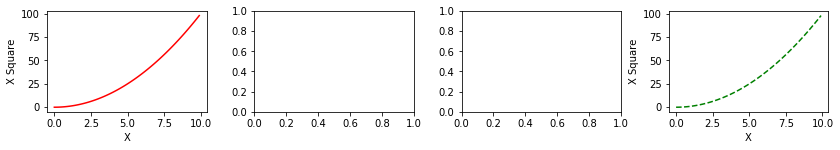

In [14]:
x = np.arange(0,10,0.1)
print(x)
y = x**2
fig = plt.figure(figsize = (14,8))
fig.subplots_adjust(top = 0.3, wspace = 0.3)
ax_1 = fig.add_subplot(141)
ax_1.set_xlabel('X')
ax_1.set_ylabel('X Square')
ax_2 = fig.add_subplot(142)
ax_3 = fig.add_subplot(143)
ax_4 = fig.add_subplot(144)
ax_4.set_xlabel('X')
ax_4.set_ylabel('X Square')
a = sns.lineplot(x, x**2 , color = 'red', ax = ax_1)
b = sns.lineplot(x , x**2 , color = 'green', ax = ax_4, dashes = 'true')
b.lines[0].set_linestyle('--')

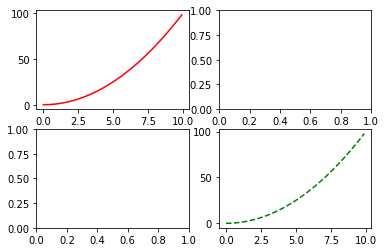

In [15]:
x = np.arange(0,10,0.1)
fig,ax = plt.subplots(nrows = 2, ncols = 2)
plt.subplot(2,2,1)
plt.plot(x, x**2, c = 'r')
plt.subplot(2,2,4)
plt.plot(x,x**2,'g--')